# Reporte de hipótesis y análisis  de test A/B sobre las métricas de la tienda en línea

Para una gran tienda online se pretende priorizar hipostesis recopiladas junto con el equipo de marketing, con el propósito de mejorar la página en orden de incrementar la convivencia de los usuarios con la página y los ingresos. Así mismo se lleva a cabo un análisis de un test A/B realizado con anterioridad.

A continuación se enlistas los distintos apartados del reporte:

Parte 1: Priorización de hipótesis
* 1 - Carga de archivo e inspección inicial de información
* 2 - Preparación de los datos
* 3 - Análisis de los datos
* 4 - Conclusiones generales

Parte 2: Análisis de test A/B
* 1 - Carga de archivo e inspección inicial de información
* 2 - Preparación de los datos
* 3 - Análisis de los datos
* 4 - Conclusiones generales

## Parte 1

### Carga de archivo e inspección inicial de información

Antes que nada se cargarán las librerías a ser utilizadas, posteriormente, se realizará la carga del documento donde se encuentran los datos a ser trabajados y se obtendrá la información de esta misma para comenzar tener una idea sobre cómo será necesario limpiar la información.

In [1]:
#Importación de librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as stats
from scipy import stats as st

#Especificación de ancho de columna
pd.set_option('max_colwidth', 450)

In [2]:
#Importación del archivo csv

data = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')

In [3]:
#Obtención de información referente a la base
data.info()
display(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


### Preparación de los datos

La base de datos es bastante simple y pequeña, todo parece encontrarse en orden, no hay duplicados y los tipos de datos de las columnas son correctos, únicamente hará falta renombrar las columnas de acuerdo con las mejores prácticas.

In [5]:
data.columns = data.columns.str.lower()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


### Análisis de los datos

A continuación priorizaremos las hipotesis primero con el método ICE y posteriormente con el método RICE. Los parametros de escala fueron obtenidos previamente y únicamente queda pendiente el estudio de su priorización.

In [6]:
# Priorización ICE

data['ICE']=(data['impact']*data['confidence'])/data['effort']

display(data.sort_values('ICE',ascending=False)[['hypothesis','ICE']])

,hypothesis,ICE
8,Launch a promotion that gives users discounts on their birthdays,16.200000
0,Add two new channels for attracting traffic. This will bring 30% more users,13.333333
7,Add a subscription form to all the main pages. This will help you compile a mailing list,11.200000
6,Show banners with current offers and sales on the main page. This will boost conversion,8.000000
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,7.000000
1,Launch your own delivery service. This will shorten delivery time,2.000000
5,Add a customer review page. This will increase the number of orders,1.333333
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,1.125000
4,Change the background color on the main page. This will increase user engagement,1.000000


In [7]:
#Priorización RICE

data['RICE']=(data['impact']*data['confidence']*data['reach'])/data['effort']

display(data.sort_values('RICE',ascending=False)[['hypothesis','RICE']])

,hypothesis,RICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,40.0
8,Launch a promotion that gives users discounts on their birthdays,16.2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,9.0
1,Launch your own delivery service. This will shorten delivery time,4.0
5,Add a customer review page. This will increase the number of orders,4.0
4,Change the background color on the main page. This will increase user engagement,3.0


Podemos observar que entre ambos métodos existen diferencias considerables en el orden de las hipótesis, permaneciendo en su lugar únicamente la 4 como última; esto implica que el factor de alcance realmente tiene mucho impacto al ser considerado. Se recomienda dejar las últimas 4 hipótesis de lado, ya que aunque cambian de posición permanecen estas cuatro como las últimas en ambos estudios, y dado que se trata de un análisis de una página de ventas, parece ser lo mejor el seguir la priorización RICE que toma el alcance en consideración.

### Conclusiones generales

Se recomienda comenzar la evaluación de hipótesis por el añadido del formato de suscripción en todas las páginas y seguir con los bloques de recomendación de productos. Esto se obtuvo a partir de una priorización RICE la cual considera el alcance de los cambios sugeridos y puede tener un mayor impacto en el negocio.

## Análisis de test A/B

De los resultados obtenidos previamente y documentados en los archivos orders_us.csv y visitors_us.csv, se procederá a obtener el análisis correspondiente a los efectos generados por la propuesta B.

### Carga de archivos e inspección inicial de información

Se realizará la carga de los documentos donde se encuentran los datos a ser trabajados y se obtendrá la información de esta misma para comenzar tener una idea sobre cómo será necesario limpiar la información.

In [8]:
#Importación del archivo csv

orders_o = pd.read_csv('/datasets/orders_us.csv', sep=',')
visitors = pd.read_csv('/datasets/visitors_us.csv', sep=',')

In [9]:
#Obtención de información referente a la base orders
orders_o.info()
display(orders_o.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [10]:
#Obtención de información referente a la base visitors
visitors.info()
display(visitors.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


En un primer momento podemos observar que para la preparación de los datos va a ser necesario cambiar los tipos de las columnas a datetime, y se buscará que no existan duplicados o problemas de usuarios que hubieran entrado en ambos grupos de trabajo. Fuera de esto no parece que pueda existir ningún problema con las bases de información en un primer momento, los nombres de las columnas cumplen con las mejores prácticas y no existen valores ausentes.

### Preparación de los datos

Comenzaremos cambiando los tipos de las columnas de fecha de ambas bases.

In [11]:
#Cambiar el tipo de datos de las columnas de fecha

visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

orders_o['date'] = orders_o['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

orders_o.info()
display(orders_o.head())
print('---')
visitors.info()
display(visitors.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


A continuación eliminaremos cualquier duplicado en las bases.

In [12]:
#Eliminación de duplicados

orders_o.drop_duplicates()
visitors.drop_duplicates()

orders_o.info()
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Al parecer no existían registros duplicados en las bases provistas. Finalmente revisaremos si es que existen usuarios que pertenecieron tanto al grupo A como al grupo B, ya que de existir va a ser importante eliminar estos casos, dado que no podemos determinar facilmente si es que el cambio en la pagina (B) pudo tener influencia en la compra realizada en el grupo de control (A).

In [13]:
usuarios_doble_grupo = orders_o.groupby('visitorId').agg({'group':'nunique'}).reset_index()
usuarios_doble_grupo = usuarios_doble_grupo[usuarios_doble_grupo['group']==2]['visitorId']
display(usuarios_doble_grupo.head())
print(usuarios_doble_grupo.shape)

2       8300375
44    199603092
51    232979603
55    237748145
66    276558944
Name: visitorId, dtype: int64

(58,)


Podemos observar que 58 de las usuarios pertenecieron a ambos grupos, dado que las compras realizadas por estos usuarios pueden afectar gravente el objetivo del ejercicio, las compras correspondientes a estos usuarios serán dejadas de considerar para el resto del análisis.

In [14]:
orders = orders_o[np.logical_not(orders_o['visitorId'].isin(usuarios_doble_grupo))]
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1016 non-null   int64         
 1   visitorId      1016 non-null   int64         
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   float64       
 4   group          1016 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 47.6+ KB


Podemos observar que al rededor del 15% de las compras tuvo que ser dejado de considerar, pero esto resulta necesario para estudiar sólo a aquellos que realmente únicamente pertenecieron a uno de los grupos de usuarios.

Con esta limpieza de la información podemos proceder al análisis de los datos.

### Análisis de los datos

Comenzaremos obteniendo una base donde se agrupe por fecha y grupo información relevanete para el estudio de valores acumulados, como lo son las visitas, los ingresos y los pedidos.

In [15]:
# Creamos matriz de parejas de fecha y grupo para tener todas las combinaciones únicas de estas

datesGroups = orders[['date','group']].drop_duplicates()

#Creamos bases de agregados con la información relevante a estudiar

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])

# Fusionamos ambas tablas para un mejor manejo de la información
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulativeData.head(5)) 

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,2266.6,719
1,2019-08-01,B,17,17,967.2,713
2,2019-08-02,A,42,36,3734.9,1338
3,2019-08-02,B,40,39,3535.3,1294
4,2019-08-03,A,66,60,5550.1,1845


A continuación dividiremos esta información por grupos para poder realizar una gráfica del ingreso acumulado.

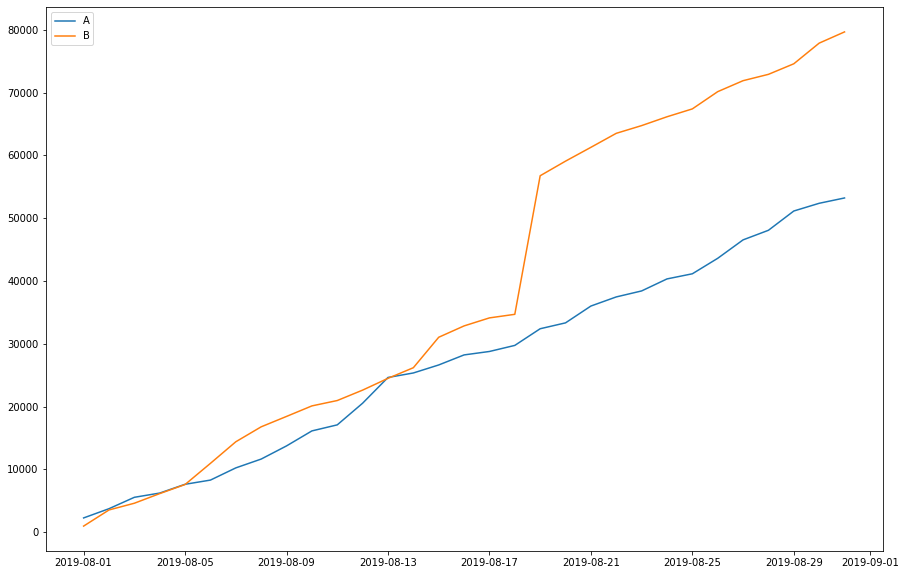

In [16]:
# Base de ingresos y pedidos del grupo A por día
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# Base de ingresos y pedidos del grupo B por día
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Gráficos de ingresos por grupo
plt_1 = plt.figure(figsize=(15, 10))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend() 



Podemos encontrar clara evidencia de un brinco pronunciado en el grupo B, el cual podría significar alguna compra excepcional o un número de compras excepcional, esto tendrá que ser revisado posteriormente. Fuera de ese brinco el comportamiento parece ser bastante normal y con una tendencia a valores un poco más elevados del grupo B. 

A continuación realizaremos un análisis similar respecto al tamaño de pedido promedio.

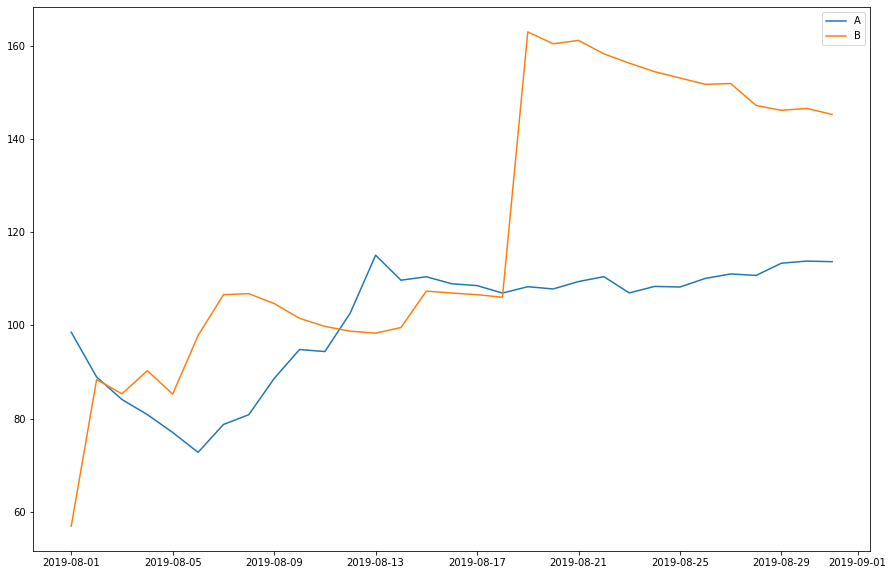

In [17]:
plt_1 = plt.figure(figsize=(15, 10))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 

En esta gráfica podemos encontrar brincos mucho más abundantes y drásticos que en la primera gráfica, denotando la importancia de limpiar la información de valores atípicos. Sin embargo, igualmente se ve una posición superior de los resultados del grupo B sobre los del grupo A.

Finalmente dentro de estos primeros análisis respecto a variables de la base orders, procederemos a obtener un gráfico de la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A.

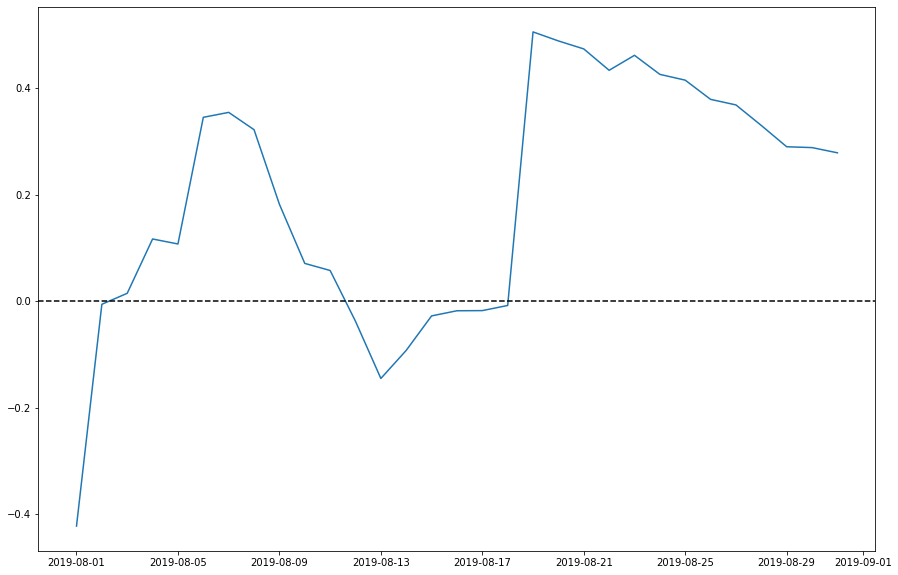

In [18]:
# Unimos los datos de ambos grupos en una nueva base
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# Gráfico de diferencia relativa para los tamaños promedio de compra
plt_1 = plt.figure(figsize=(15, 10))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# Referencia visual de Y=0
plt.axhline(y=0, color='black', linestyle='--') 

Una vez más los valores atípicos parecen estar haciendo ruido en el análisis buscado, va a resultar de gran importancia quitarlos de la información. Además las tendencias, independiente de los brincos, parecen estar oscilando bastante, por lo que quizás aún no es momento de detener la prueba.

A continuación desarrollaremos un análisis similar con la tasa de conversión de los grupos.

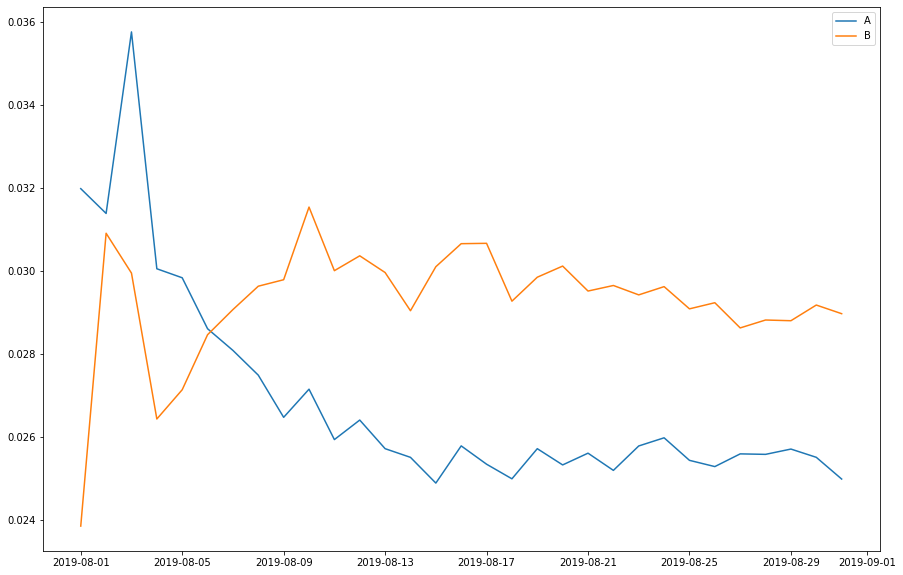

In [19]:
# Conversión acumulada
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# Grupos
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# Gráficos por grupo de conversión acumulada
plt_1 = plt.figure(figsize=(15, 10))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

Aunque a simple vista los gráficos podrían parecer cumplir una cierta simetría, realmente no es el caso, es más bien la tendencia a la estabilización la que genera ese efecto visual. Podemos observar claramente que la tendencia de B es bastante mayor a la tendencia de A indicando un efecto positivo de la prueba impuesta sobre el grupo B respecto a niveles de conversión.

Ahora, al igual que con los ingresos medios por compra, realizaremos un gráfico de la diferencia relativa en la conversión acumulada para el grupo B en comparación con el grupo A.

(18109.0, 18139.0, -0.3, 0.3)

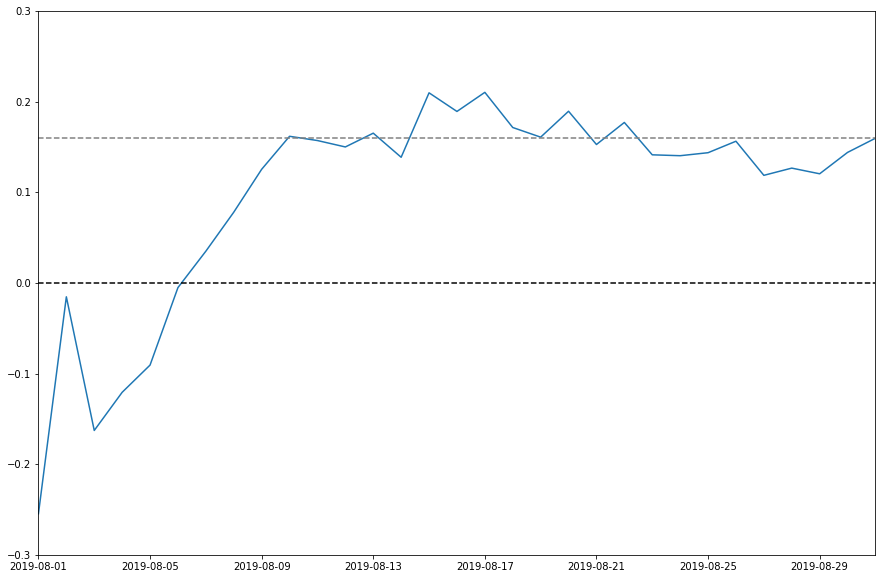

In [20]:
# Unimos los datos de ambos grupos en una nueva base
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# Gráfico de diferencia relativa para los tamaños promedio de compra
plt_1 = plt.figure(figsize=(15, 10))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)

# Referencia visuales de Y
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.16, color='grey', linestyle='--')
plt.axis([pd.to_datetime('2019-08-01'), pd.to_datetime('2019-08-31'), -0.3, 0.3]) 

En un inicio, el grupo B estaba rezagado pero rápidamente tomó la delantera, donde se mantuvo alrededor del 0.16 de manera relativamente estable, sin embargo, lo mejor será realizar el correspondiente análisis de valores atipicos, que observamos afectan significativamente los resultados respecto a ingresos y pedidos.

Para detectar los valores atipicos, primero realizaremos histogramas respecto al número de pedidos y a los importes de los mismos para ubicar las anomalías graficamente.

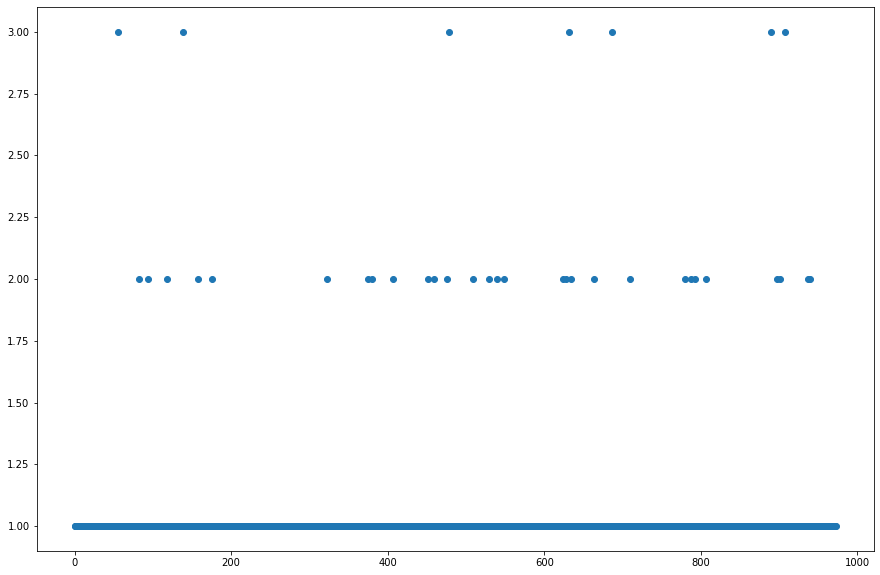

In [21]:
#Agrupamos las órdenes por usuarios
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

#Histograma respecto a pedidos

x_values_orders = pd.Series(range(0,len(ordersByUsers)))
plt_1 = plt.figure(figsize=(15, 10))
plt.scatter(x_values_orders, ordersByUsers['transactionId']) 

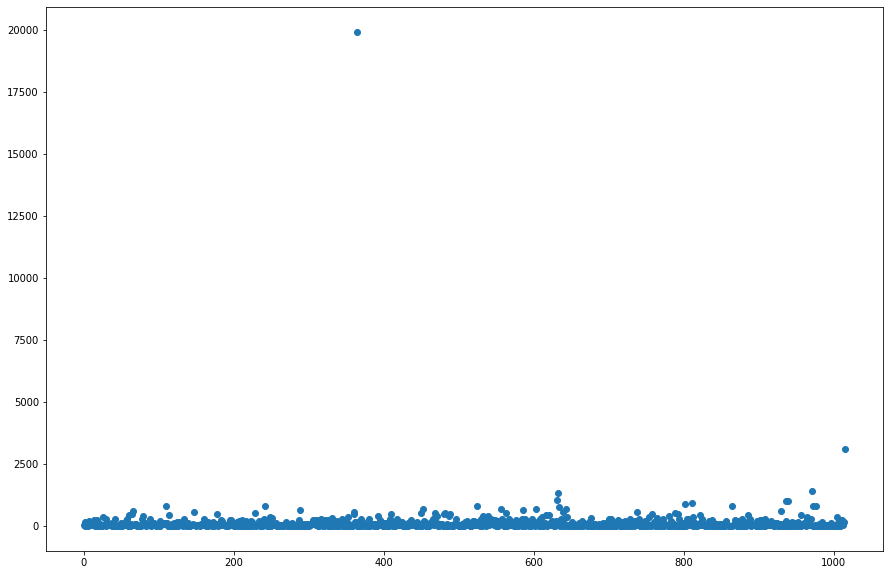

In [22]:
#Histograma respecto a importes

x_values_revenue = pd.Series(range(0, len(orders['revenue'])))
plt_1 = plt.figure(figsize=(15, 10))
plt.scatter(x_values_revenue, orders['revenue']) 

Como podemos obarvar claramente en ambas gráficas, los valores atípicos se encuentran demasiado alejados de los valores generales y pueden en efecto estar alterando considerablemente cualquier estudio sobre acumulados realizado; las transacciones normalmente parecen ubicarse en 1, y los ingresos por transacción por debajo de los 2500, existiendo excepciones de cuatro compras y pedidos de 20000. Procederemos a evaluar los percentiles 90, 95 y 99 de ambas cifras para poder determinar los datos que deben ser conservados con el propósito de no afectar considerablemente los resultados.

In [23]:
print('Orders:')
print(np.percentile(ordersByUsers['transactionId'], [90, 95, 99])) 
print()
print('Revenue:')
print(np.percentile(orders['revenue'], [90, 95, 99])) 

Orders:
[1. 1. 2.]

Revenue:
[280.8   414.275 830.3  ]


Podemos encontrar claramente que sólo el 1% realiza más de dos pedidos y únicamente el 1% realiza un pedido de más de 830. Se considerará que cualquier usuario que entre dentro de alguno de estos 1% se encuentra dentro de los usuarios atípicos y afecta considerablemente los resulatados del análisis, por lo que dejarán de ser considerados en los estudios por realizar a continuación.

Para observar los efectos de limpiar los datos mencionados previamente, primero realizaremos un estudio de la hipótesis sobre que existe una distinción estadística significativa en los datos con los datos originales respecto a la conversión y a los importes medios de compra.

In [24]:
# Datos originales, conversión: significancia estadística

ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders'] 

#Obtención de pedidos
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0) 

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.011
0.160


Según los datos originales existe una diferencia significativa entre los grupos A y B, podemos rechazar la hipótesis nula dado un nivel de significancia de 0.5 (alpha). La ganancia relativa del grupo B respecto al A es de 16%.

A continuación realizaremos un análisis similar con los datos originales respecto al pedido medio de los clientes.

In [25]:
# Datos originales, media pedido: significancia estadística

print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.862
0.278


En este caso, aunque la diferencia es de 27.8%, no existe razón para rechazar la hipótesis nula 0.862 superando considerablemente el umbral de significancia de 0.05.

Ahora filtremos los datos para encontrar, quitando los registros correspondientes a usuarios atípicos, cómo varian las métricas obtenidas. Filtraremos como aquellos usuarios con más de dos pedidos y con un valor mayor a 830.3.

In [26]:
#Filtrado de los datos

usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 830.3]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print(abnormalUsers.shape) 

1099    148427295
33      249864742
58      611059232
949     887908475
744     888512513
dtype: int64
(16,)


Existen 16 usuarios atípicos que procederemos a eliminar del análisis.

In [27]:
#Grupos filtrados

sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

# Datos filtrados, conversión: significancia estadística
print('Conversión')
print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

print()

# Datos filtrados, conversión: significancia estadística
print('Pedido medio')
print('{0:.3f}'.format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print('{0:.3f}'.format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

Conversión
0.007
0.189

Pedido medio
0.822
-0.032


Podemos observar que existe una diferencia en las métricas al utilizar los datos originales y los filtrados, aunque no afecta considerablemente la lectura final de los datos. La significancia respecto a la conversión aumento, denotando la diferencia entre las poblaciones y con una diferencia de 18.9% del grupo B respecto al A. Mientras que en el pedido medio no hay razones para rechazar la hipótesis nula, con una reducción del 3.2% del pedido medio.

### Conclusiones generales

Tras haber realizado el análisis de la prueba A/B, pudimos observar que los datos originales se encontraban considerablemente contaminados por valores atípicos de al rededor del 1%, lo cual era evidente al realizar las gráficas de los valores acumulados, ya que estas presentaban picos y brincos significativos. Tras filtrar los datos pudimos determinar que la prueba A/B marca a B como el grupo lider, que aunque no demostró una gran diferencia respecto al monto de pedido medio, sí mostro un incremento significativo del 18.9% en la tasa de conversión. Por esta razón, la recomendación es, de manera inmediata, aplicar de manera general los cambios probados en B.

En cuanto al aumento del pedido medio, al no existir resultados estadísticamente significativos, se aconjseja probar  continuar con el periodo de la prueba A/B en espera de la evolución de los resultados hacía valores más significativos. En caso de detener la prueba podría tratarse con otras hipótesis, en las cuales sería prefeible intervenir menos en la facilidad de uso de la página y más en la implementación de llamadas a acción, así como promociones, para incentivar un mayor consumo.